# Neural Network - Multi-layer Perceptron (MLP)

useful link: http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier  
http://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [1]:
import numpy as np

# global variable
global img_number
img_number = 550

output_filename = 'digit_fv.train'
digit_data = np.loadtxt(output_filename, dtype='float64')

print("Size of the feature vector", digit_data.shape)
print digit_data[0:10,0:]

('Size of the feature vector', (978, 785))
[[ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]]


In [2]:
import math
from skimage import io

# show image
def vec2img(vec):
    
    img_row = int(math.sqrt(vec.shape[0]))
    img_col = img_row
    img = vec.reshape((img_row, img_col))
    
    io.imshow(img)
    io.show()
    
# check predict
def chkpredict(actual_class, predict_class):
    if(actual_class==predict_class):
        print("(Correct prediction)")
    else:
        print("(Incorrect prediction)")

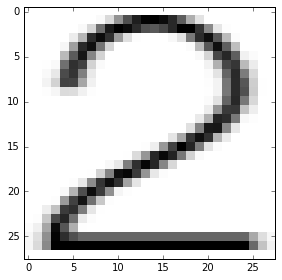

In [3]:
# show image
vec2img(digit_data[img_number,1:])

In [4]:
from sklearn.neural_network import MLPClassifier

X = digit_data[:,1:]
y = digit_data[:,0]

# create MLP model
clf_mlp = MLPClassifier(alpha=1, hidden_layer_sizes=(15,30), max_iter=20, verbose=False)
clf_mlp.fit(X,y)

/usr/local/lib/python2.7/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [5]:
print("Training set score: %f" % clf_mlp.score(X, y))
print("Training set loss: %f" % clf_mlp.loss_)

Training set score: 1.000000
Training set loss: 0.212084


In [6]:
# Prediction

print("Actual", y[img_number])
predict_class = clf_mlp.predict([X[img_number,:]])
print("Predict", predict_class)
chkpredict(y[img_number], predict_class)

('Actual', 2.0)
('Predict', array([ 2.]))
(Correct prediction)


# MLP

In [7]:
#link: https://www.kdnuggets.com/2016/10/beginners-guide-neural-networks-python-scikit-learn.html/2
# Data Preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


scaler = StandardScaler()

X = digit_data[:,1:]
y = digit_data[:,0]

# Fit only to the training data
scaler.fit(X)
X_train = scaler.transform(X)

mlp = MLPClassifier(hidden_layer_sizes=(30,30), max_iter=200)
mlp.fit(X_train,y)

# predict
predictions = mlp.predict(X_train)

# Predictions and Evaluation
print("Confusion matrix")
print(confusion_matrix(y,predictions))
print("\nAccuracy score")      
print(accuracy_score(y,predictions)*100)
print("\nPrecision & Recall")
print(classification_report(y,predictions))

Confusion matrix
[[100   0   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0   0  84   0   0   0   0   0   0   0]
 [  0   0   0  91   0   0   0   0   0   0]
 [  0   0   0   0  93   0   0   0   0   0]
 [  0   0   0   0   0  92   0   0   0   0]
 [  0   0   0   0   0   0 109   0   0   0]
 [  0   0   0   0   0   0   0  94   0   0]
 [  0   0   0   0   0   0   0   0 101   0]
 [  0   0   0   0   0   0   0   0   0 114]]

Accuracy score
100.0

Precision & Recall
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       100
        1.0       1.00      1.00      1.00       100
        2.0       1.00      1.00      1.00        84
        3.0       1.00      1.00      1.00        91
        4.0       1.00      1.00      1.00        93
        5.0       1.00      1.00      1.00        92
        6.0       1.00      1.00      1.00       109
        7.0       1.00      1.00      1.00        94
        8.0       1.00      1.00

In [8]:
# MLP Weight and biases

#coefs_ is a list of weight matrices, where weight matrix at index i represents the weights between layer i and layer i+1.

#intercepts_ is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.

print len(mlp.coefs_)
#print mlp.coefs_

print len(mlp.coefs_[0])
#mlp.intercepts_[0]

3
784


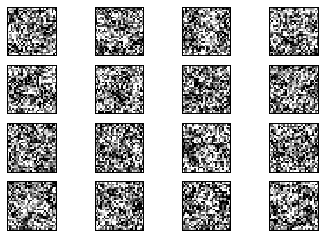

In [9]:
#http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

# MLP parameters
```
    MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,  
       beta_2=0.999, early_stopping=False, epsilon=1e-08,  
       hidden_layer_sizes=(15, 30), learning_rate='constant',  
       learning_rate_init=0.001, max_iter=20, momentum=0.9,  
       nesterovs_momentum=True, power_t=0.5, random_state=None,  
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,  
       verbose=False, warm_start=False)  
```  

grid search: http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py  

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from time import time

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
param_grid = {"learning_rate":["constant", "invscaling", "adaptive", "constant"],
              "hidden_layer_sizes": [(20,), (10,)]}
              
    
# run grid search
grid_search = GridSearchCV(mlp, param_grid=param_grid)
start = time()
grid_search.fit(X_train, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid_search.best_params_, grid_search.best_score_))
print("\nGridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

The best parameters are {'learning_rate': 'invscaling', 'hidden_layer_sizes': (20,)} with a score of 1.00

GridSearchCV took 12.61 seconds for 8 candidate parameter settings.
Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'learning_rate': 'invscaling', 'hidden_layer_sizes': (20,)}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'learning_rate': 'adaptive', 'hidden_layer_sizes': (20,)}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'learning_rate': 'invscaling', 'hidden_layer_sizes': (10,)}



In [12]:
# run randomized search
n_iter_search = 5
random_search = RandomizedSearchCV(mlp, param_distributions=param_grid,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X_train, y)
print("The best parameters are %s with a score of %0.2f"
      % (random_search.best_params_, random_search.best_score_))
print("\nRandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

The best parameters are {'learning_rate': 'invscaling', 'hidden_layer_sizes': (20,)} with a score of 1.00

RandomizedSearchCV took 7.16 seconds for 5 candidates parameter settings.
Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'learning_rate': 'invscaling', 'hidden_layer_sizes': (20,)}

Model with rank: 2
Mean validation score: 0.985 (std: 0.022)
Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (20,)}

Model with rank: 3
Mean validation score: 0.970 (std: 0.042)
Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (20,)}

